In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 32
CHANNELS = 3
EPOCHS = 100

In [3]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/cifar10-original-all/cifar10_raw/images/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 60000 files belonging to 10 classes.


In [4]:
class_names = ds.class_names
class_names

['Airplane',
 'Automobile',
 'Bird',
 'Cat',
 'Deer',
 'Dog',
 'Frog',
 'Horse',
 'Ship',
 'Truck']

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

(32, 32, 32, 3)


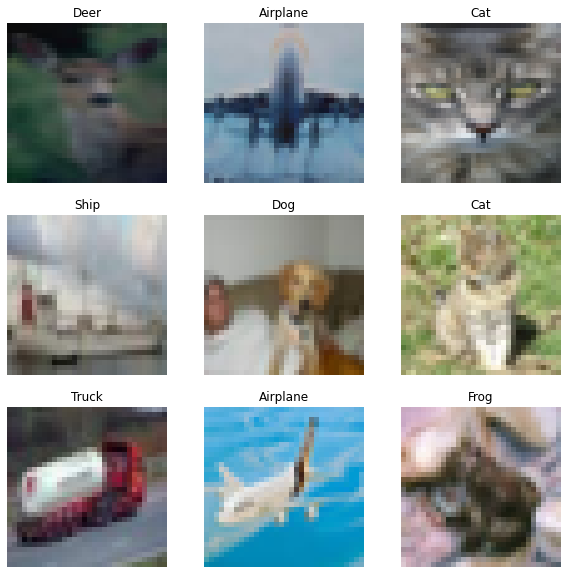

In [5]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in ds.take(1):
    print(image_batch.shape)
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [6]:
len(ds)

1875

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(ds)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
])

In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model
model.build(input_shape=(None, *input_shape))


In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)         

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/100


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

1495/1500 [============================>.] - ETA: 0s - loss: 1.9849 - accuracy: 0.2518

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

1500/1500 [==============================] - 76s 17ms/step - loss: 1.9842 - accuracy: 0.2520 - val_loss: 1.8202 - val_accuracy: 0.3244
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.7352 - accuracy: 0.3620 - val_loss: 1.6234 - val_accuracy: 0.4078
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6273 - accuracy: 0.4079 - val_loss: 1.4922 - val_accuracy: 0.4641
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.5542 - accuracy: 0.4400 - val_loss: 1.4394 - val_accuracy: 0.4840
Epoch 5/100
1500/1500 [==============================] - 10s 6ms/step - loss: 1.5071 - accuracy: 0.4543 - val_loss: 1.4525 - val_accuracy: 0.4716
Epoch 6/100
1500/1500 [==============================] - 10s 6ms/step - loss: 1.4729 - accuracy: 0.4689 - val_loss: 1.3677 - val_accuracy: 0.5100
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4402 - accuracy: 0.4820 - val_loss: 1.4028 - val_accuracy: 

In [16]:
scores = model.evaluate(test_ds)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

 64/188 [=========>....................] - ETA: 0s - loss: 1.0301 - accuracy: 0.6509 

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


188/188 [==============================] - 28s 2ms/step - loss: 1.0179 - accuracy: 0.6459


In [17]:
scores

[1.0179309844970703, 0.6459441781044006]

In [18]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 1500}

In [19]:
history.history["loss"]

[1.9842350482940674,
 1.7351558208465576,
 1.6272577047348022,
 1.554186224937439,
 1.5070501565933228,
 1.4729087352752686,
 1.4401769638061523,
 1.4060403108596802,
 1.3802975416183472,
 1.3584260940551758,
 1.3442860841751099,
 1.3271167278289795,
 1.3125948905944824,
 1.2947731018066406,
 1.2879985570907593,
 1.2698203325271606,
 1.2584524154663086,
 1.2487707138061523,
 1.244552493095398,
 1.2301584482192993,
 1.2233221530914307,
 1.2158499956130981,
 1.2119617462158203,
 1.2004696130752563,
 1.1954045295715332,
 1.1871113777160645,
 1.1845897436141968,
 1.1757715940475464,
 1.1721328496932983,
 1.1670446395874023,
 1.159030795097351,
 1.155887484550476,
 1.1473240852355957,
 1.1496683359146118,
 1.1455661058425903,
 1.134984016418457,
 1.137102484703064,
 1.1252150535583496,
 1.1267668008804321,
 1.124082326889038,
 1.1196116209030151,
 1.1079533100128174,
 1.1081637144088745,
 1.1017595529556274,
 1.0973269939422607,
 1.0952227115631104,
 1.0930596590042114,
 1.0936814546585083,

In [20]:
history.history["accuracy"]

[0.25200000405311584,
 0.3619583249092102,
 0.40793749690055847,
 0.4400208294391632,
 0.4543125033378601,
 0.468916654586792,
 0.4819583296775818,
 0.4932916760444641,
 0.5035416483879089,
 0.5116041898727417,
 0.5181875228881836,
 0.5276250243186951,
 0.5306666493415833,
 0.5379166603088379,
 0.5402708053588867,
 0.5448333621025085,
 0.5508124828338623,
 0.5548333525657654,
 0.5582500100135803,
 0.5619791746139526,
 0.5652083158493042,
 0.5669375061988831,
 0.567104160785675,
 0.5724583268165588,
 0.5770208239555359,
 0.5783125162124634,
 0.5808749794960022,
 0.5818958282470703,
 0.5850416421890259,
 0.582812488079071,
 0.5885833501815796,
 0.590666651725769,
 0.5953333377838135,
 0.5919791460037231,
 0.5915625095367432,
 0.5979791879653931,
 0.5972291827201843,
 0.6007083058357239,
 0.6011666655540466,
 0.601312518119812,
 0.6026874780654907,
 0.6082916855812073,
 0.6102916598320007,
 0.6119999885559082,
 0.6122083067893982,
 0.6120208501815796,
 0.6143749952316284,
 0.6155208349227

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

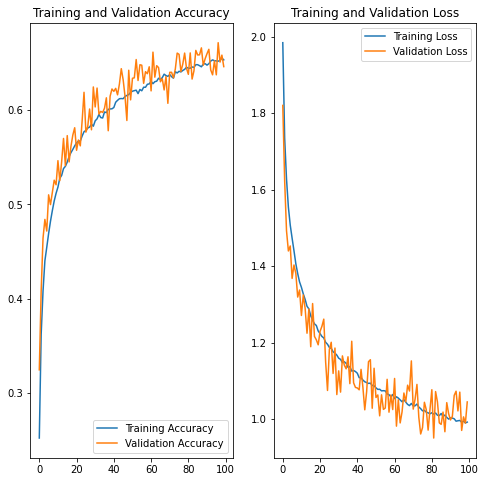

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()